## SC1015 Mini Assignment 2/4/2023

To do:
- Complete EDA for all variables (William)
- First multi-variate training (Ying Xi / Monday)
- Second multi-variate training (Andrew / Wednesday)

#### Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

#### Importing the DataSet


In [2]:
creditcardData=pd.read_csv("credit-approval_csv.csv")
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [3]:
creditcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

#### Observations
1. Approved_Status is the response variable

2. There are some NULL values in the dataset, we need to explore more on those predictors to decide:
- To drop all the NULL values   OR
- fill the NULL values with median or mode

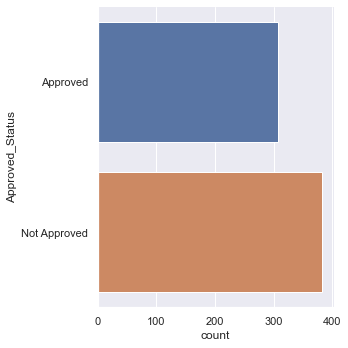

In [4]:
sb.catplot(y="Approved_Status",data=creditcardData,kind="count")

In [5]:
No_notapproved,No_approved=creditcardData["Approved_Status"].value_counts()
print("Ratio of Approved:Not_Approved=",No_approved,":",No_notapproved)
print("Approved percentage: {0:.2f} %".format((No_approved/(No_notapproved+No_approved))*100))

Ratio of Approved:Not_Approved= 307 : 383
Approved percentage: 44.49 %


We see that the percentage of approved credit card is  44.49%, which is slightly less than 50%. We need more information to predict the approval of a credit card, if not its just like a naive guess.

---

### Exploring the Numerical Predictors

In [6]:
creditcardData.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Exploration of response variable `Debt`

<AxesSubplot:>

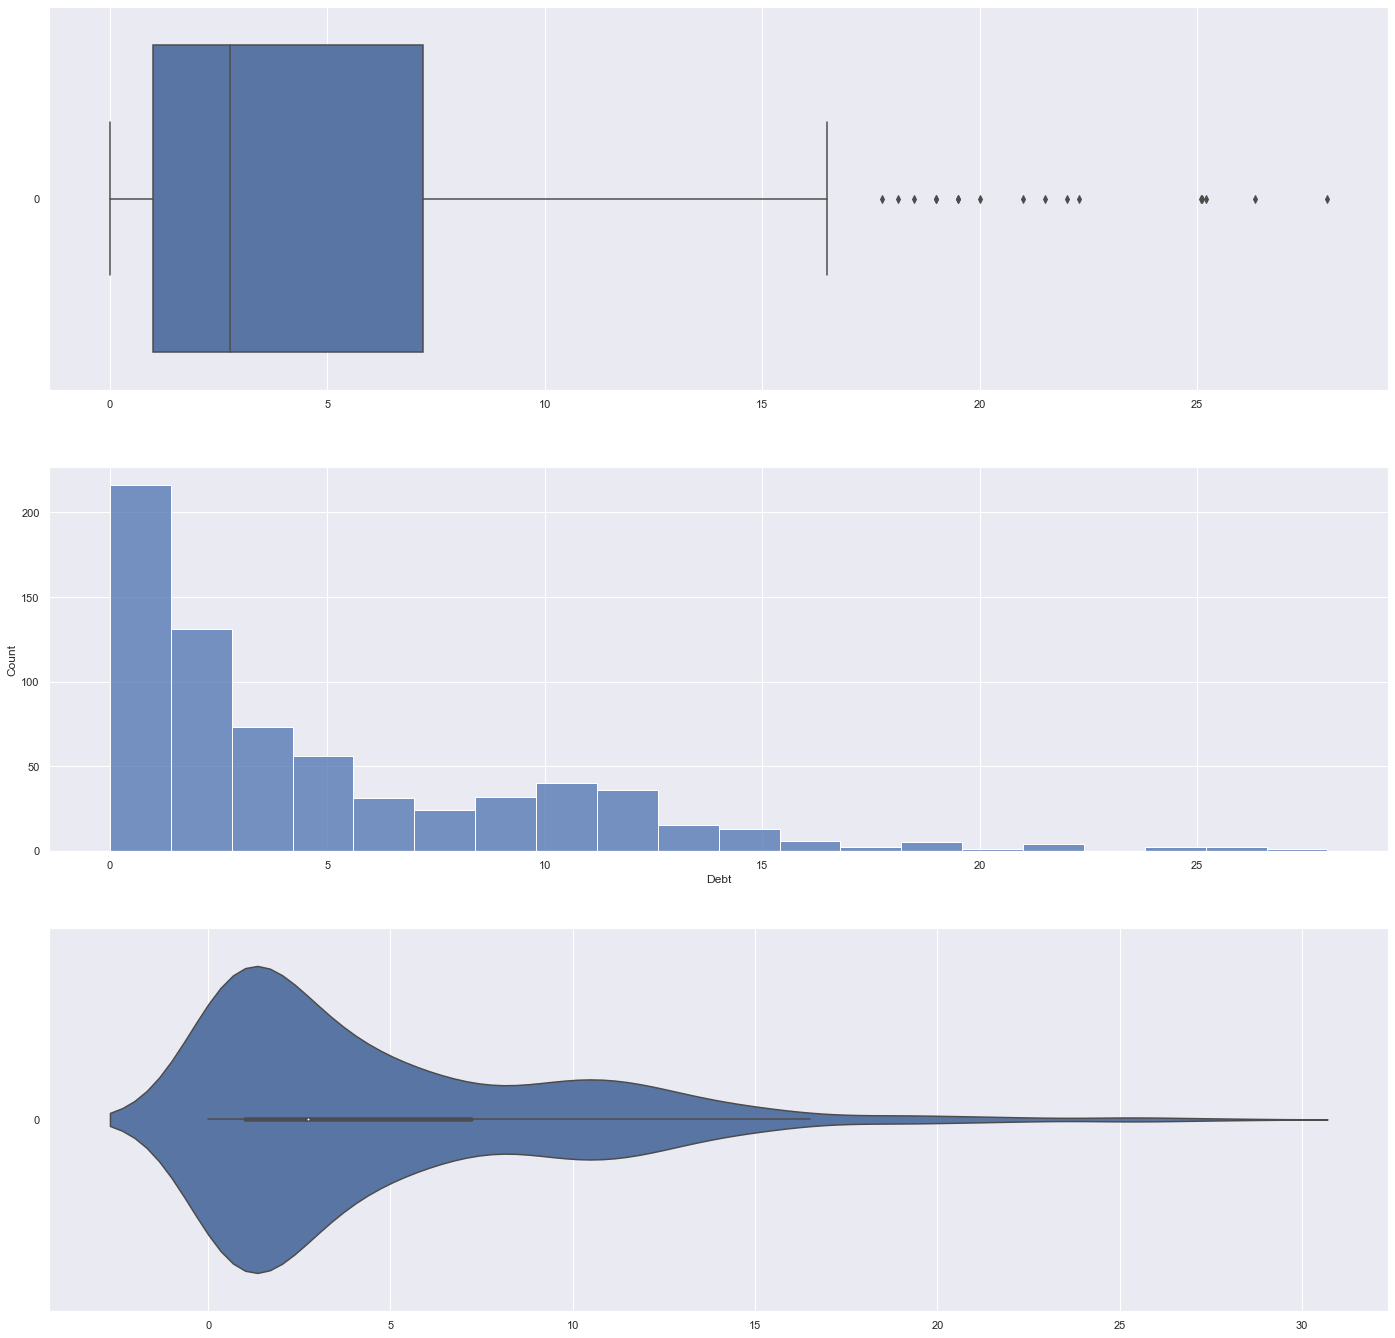

In [7]:
f, axes = plt.subplots(3, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Debt'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Debt'], ax = axes[1])
sb.violinplot(data = creditcardData['Debt'], orient = "h", ax = axes[2])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Debt', ylabel='Approved_Status'>

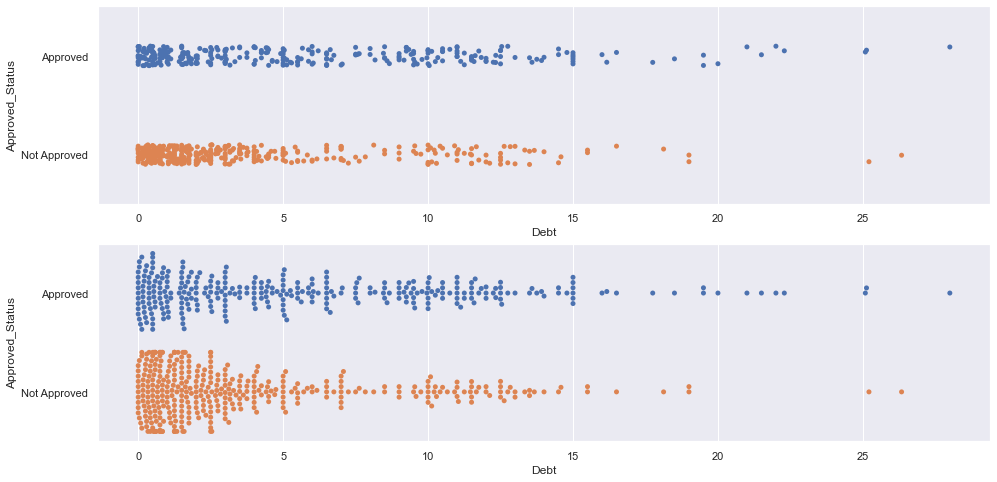

In [8]:
f,axes=plt.subplots(2,1,figsize=(16,8))
sb.stripplot(x = 'Debt', y = 'Approved_Status', data = creditcardData, ax=axes[0])
sb.swarmplot(data=creditcardData,x="Debt",y="Approved_Status",ax=axes[1])

Exploration of variable `YearsEmployed`

<AxesSubplot:>

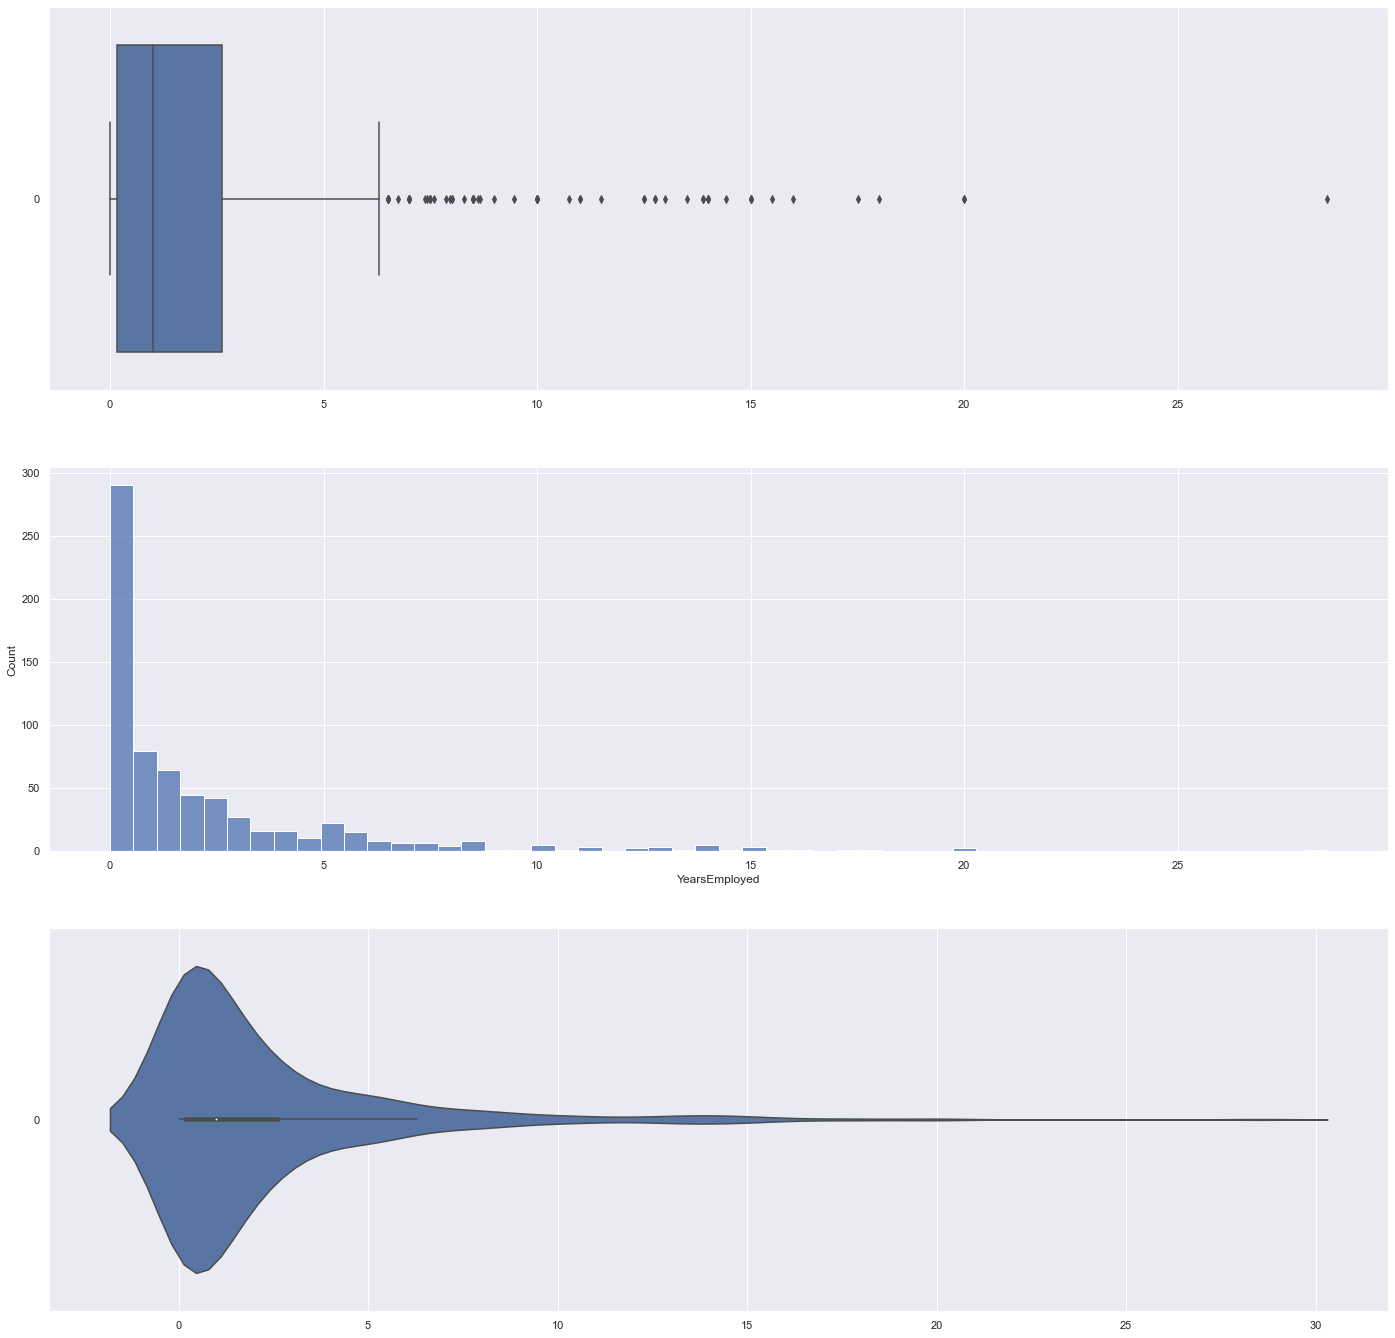

In [9]:
# Plot basic uni-variate figures
f, axes = plt.subplots(3, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['YearsEmployed'], ax = axes[1])
sb.violinplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[2])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='YearsEmployed', ylabel='Approved_Status'>

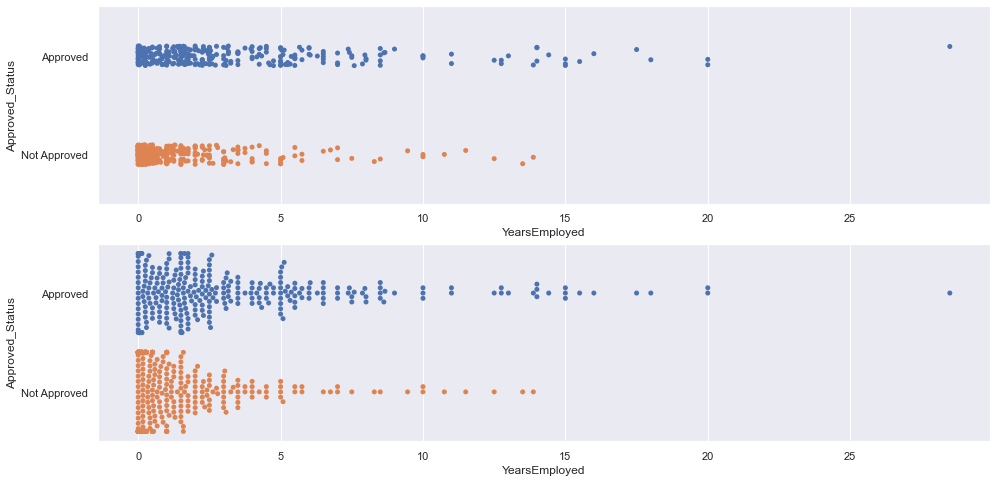

In [10]:
f,axes=plt.subplots(2,1,figsize=(16,8))
sb.stripplot(x = 'YearsEmployed', y = 'Approved_Status', data = creditcardData, ax=axes[0])
sb.swarmplot(data=creditcardData,x="YearsEmployed",y="Approved_Status",ax=axes[1])

Exploration of variable `Age`

<AxesSubplot:>

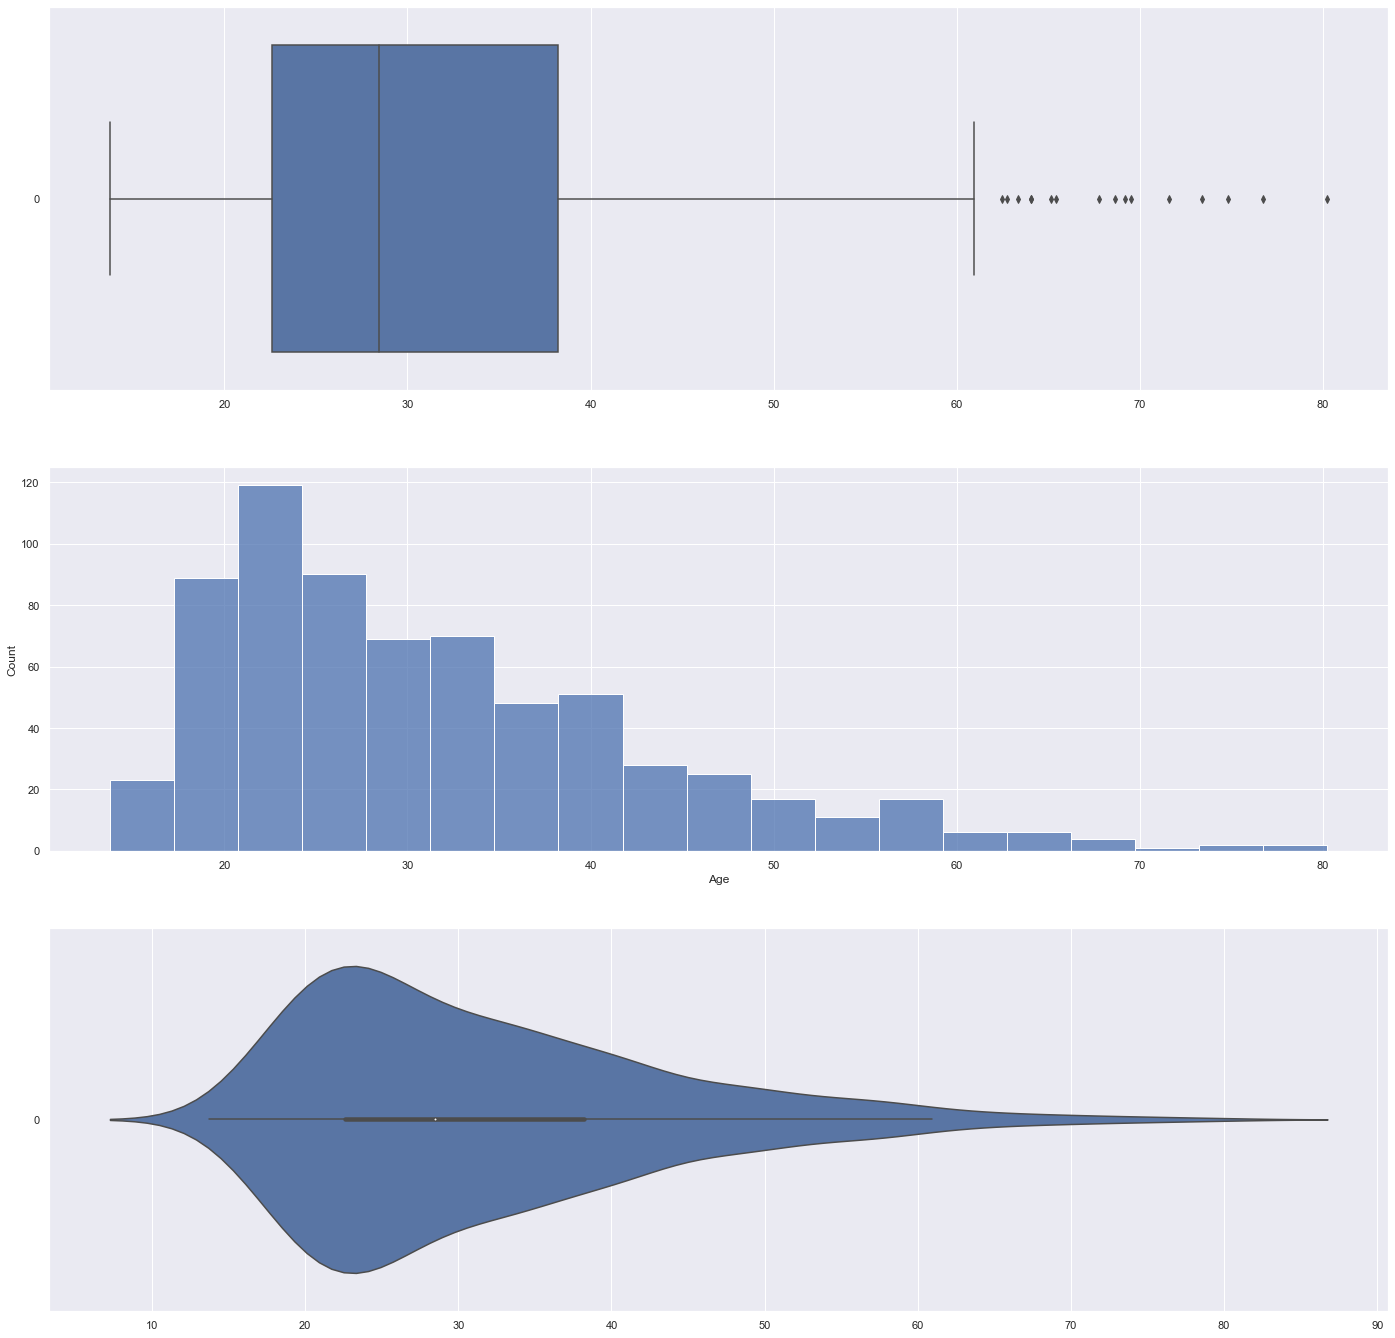

In [11]:
f, axes = plt.subplots(3, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Age'], ax = axes[1])
sb.violinplot(data = creditcardData['Age'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Age', ylabel='Approved_Status'>

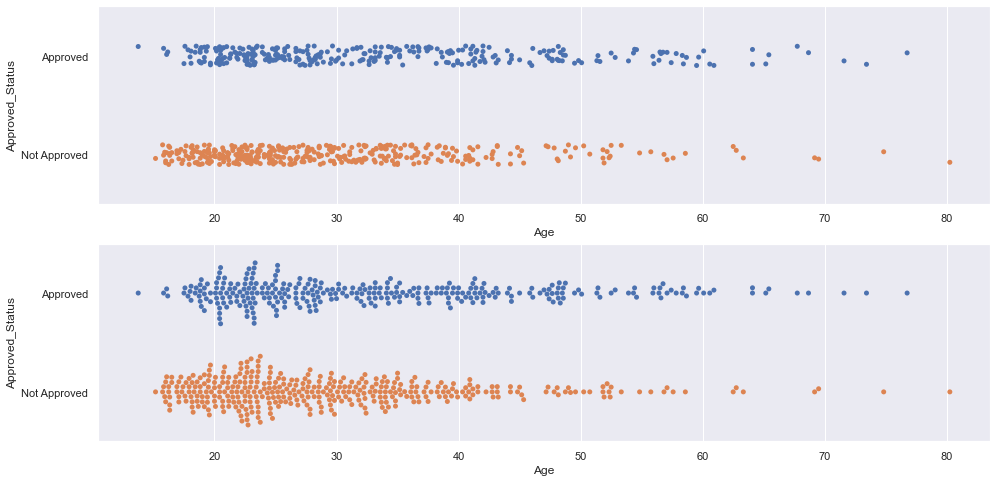

In [12]:
f,axes=plt.subplots(2,1,figsize=(16,8))
sb.stripplot(x = 'Age', y = 'Approved_Status', data = creditcardData, ax=axes[0])
sb.swarmplot(data=creditcardData,x="Age",y="Approved_Status",ax=axes[1])

### Exploring the Categorical Predictors

In [13]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [14]:
creditcardData["Married"].value_counts()

u    519
y    163
l      2
Name: Married, dtype: int64

In [15]:
creditcardData["Citizen"].value_counts()

g    625
s     57
p      8
Name: Citizen, dtype: int64

In [16]:
print("Discovering the values of EducationLevel")
creditcardData["EducationLevel"].value_counts()

Discovering the values of EducationLevel


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [17]:
print("Discovering the values of Ethnicity")
creditcardData["Ethnicity"].value_counts()

Discovering the values of Ethnicity


v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

Variables "EducationLevel" and "Ethnicity" have too many ambiguous value. After checking the dataset source, we knew that most of the people do not want to disclose these info as they are confidential. Therefore, we will drop this variables out of our predictors.


---

In [18]:
# Drop EducationalLevel and Ethnicity
todrop=["EducationLevel","Ethnicity"]
ccData=creditcardData.drop(columns=todrop)
ccData.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+,Approved


In [19]:
# Drop Null Values
ccData.dropna(inplace=True)
ccData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 689
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           654 non-null    object 
 1   Age              654 non-null    float64
 2   Debt             654 non-null    float64
 3   Married          654 non-null    object 
 4   BankCustomer     654 non-null    object 
 5   YearsEmployed    654 non-null    float64
 6   PriorDefault     654 non-null    object 
 7   Employed         654 non-null    object 
 8   CreditScore      654 non-null    int64  
 9   DriversLicense   654 non-null    object 
 10  Citizen          654 non-null    object 
 11  ZipCode          654 non-null    float64
 12  Income           654 non-null    int64  
 13  Approved         654 non-null    object 
 14  Approved_Status  654 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.8+ KB


In [20]:
print("After dropping all the ambiguous / NULL values in the dataset, {0:.2f}% of data dropped".format(((690-654)/690)*100))

After dropping all the ambiguous / NULL values in the dataset, 5.22% of data dropped


<AxesSubplot:xlabel='Approved_Status', ylabel='Gender'>

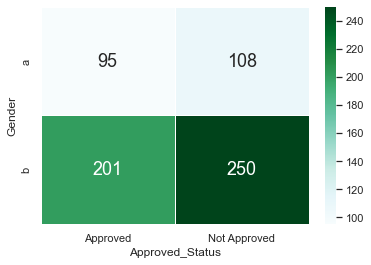

In [21]:
sb.heatmap(ccData.groupby(['Gender','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'BuGn')

<AxesSubplot:xlabel='Approved_Status', ylabel='Married'>

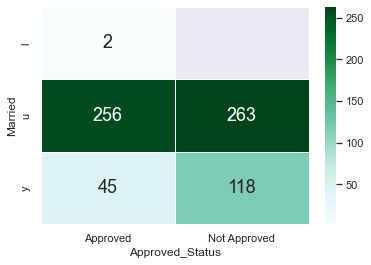

In [22]:
sb.heatmap(creditcardDataStr.groupby(['Married','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'BuGn')

<AxesSubplot:xlabel='Approved_Status', ylabel='DriversLicense'>

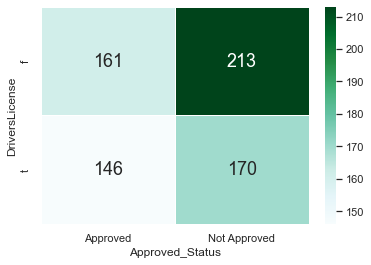

In [23]:
sb.heatmap(creditcardDataStr.groupby(['DriversLicense','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'BuGn')

---

# !! U guys can watch the project discussion lecture and i think we think to do model training using individual variable to get better insight.

## Need to redo model training (ALL VARIABLES)

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Gender','Married','Employed','DriversLicense','PriorDefault','DriversLicense','Citizen']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_a          654 non-null    float64
 1   Gender_b          654 non-null    float64
 2   Married_l         654 non-null    float64
 3   Married_u         654 non-null    float64
 4   Married_y         654 non-null    float64
 5   Employed_f        654 non-null    float64
 6   Employed_t        654 non-null    float64
 7   DriversLicense_f  654 non-null    float64
 8   DriversLicense_t  654 non-null    float64
 9   PriorDefault_f    654 non-null    float64
 10  PriorDefault_t    654 non-null    float64
 11  DriversLicense_f  654 non-null    float64
 12  DriversLicense_t  654 non-null    float64
 13  Citizen_g         654 non-null    float64
 14  Citizen_p         654 non-null    float64
 15  Citizen_s         654 non-null    float64
dtypes: float64(16)
memory usage: 81.9 KB


In [25]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['Age','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 653
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               619 non-null    float64
 1   YearsEmployed     619 non-null    float64
 2   Income            619 non-null    float64
 3   Debt              619 non-null    float64
 4   Gender_a          619 non-null    float64
 5   Gender_b          619 non-null    float64
 6   Married_l         619 non-null    float64
 7   Married_u         619 non-null    float64
 8   Married_y         619 non-null    float64
 9   Employed_f        619 non-null    float64
 10  Employed_t        619 non-null    float64
 11  DriversLicense_f  619 non-null    float64
 12  DriversLicense_t  619 non-null    float64
 13  PriorDefault_f    619 non-null    float64
 14  PriorDefault_t    619 non-null    float64
 15  DriversLicense_f  619 non-null    float64
 16  DriversLicense_t  619 non-null    float64
 1

[Text(0.5576923076923077, 0.9166666666666666, 'PriorDefault_f <= 0.5\ngini = 0.497\nsamples = 433\nvalue = [199, 234]\nclass = Y'),
 Text(0.28846153846153844, 0.75, 'Income <= 451.0\ngini = 0.42\nsamples = 233\nvalue = [163, 70]\nclass = N'),
 Text(0.14102564102564102, 0.5833333333333334, 'YearsEmployed <= 1.312\ngini = 0.487\nsamples = 157\nvalue = [91, 66]\nclass = N'),
 Text(0.05128205128205128, 0.4166666666666667, 'Debt <= 0.395\ngini = 0.478\nsamples = 66\nvalue = [26, 40]\nclass = Y'),
 Text(0.02564102564102564, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.07692307692307693, 0.25, 'Debt <= 1.648\ngini = 0.451\nsamples = 61\nvalue = [21, 40]\nclass = Y'),
 Text(0.05128205128205128, 0.08333333333333333, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]\nclass = Y'),
 Text(0.10256410256410256, 0.08333333333333333, 'gini = 0.495\nsamples = 42\nvalue = [19, 23]\nclass = Y'),
 Text(0.23076923076923078, 0.4166666666666667, 'Age <= 24.71\ngini = 0.408\nsamples = 91\nva

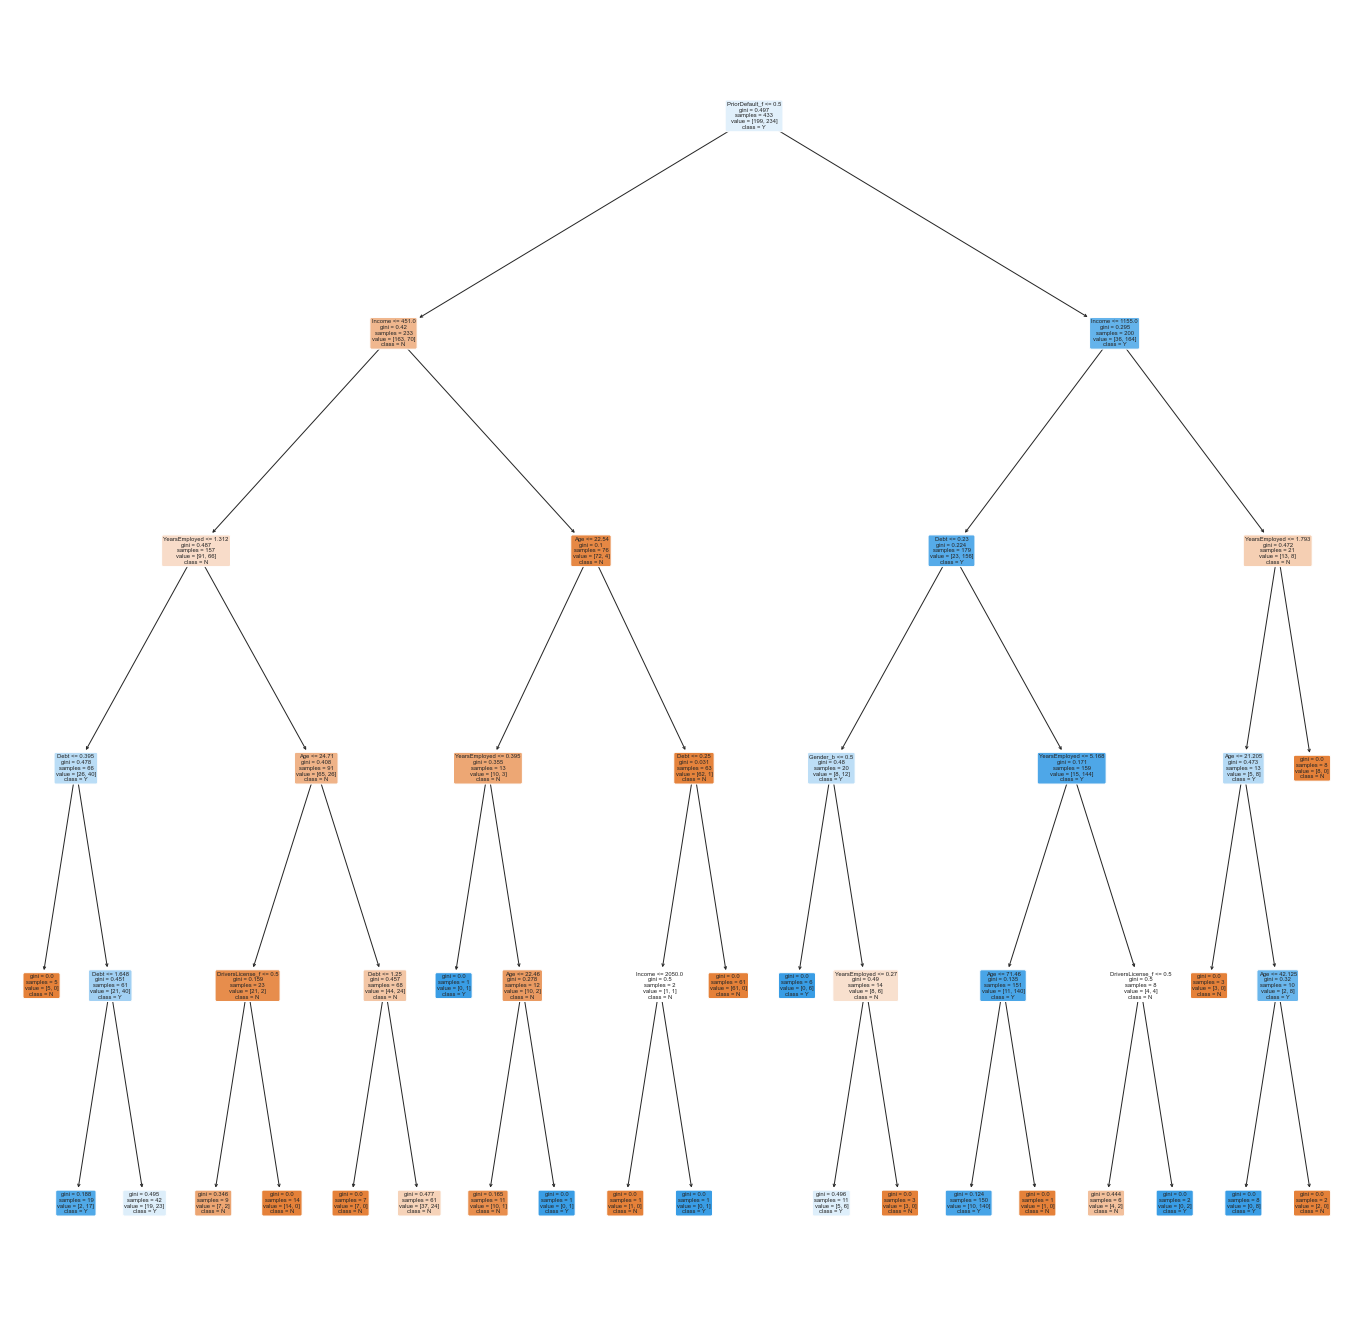

In [47]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.8498845265588915

TPR Train :	 0.8760683760683761
TNR Train :	 0.8190954773869347

FPR Train :	 0.18090452261306533
FNR Train :	 0.12393162393162394


<AxesSubplot:>

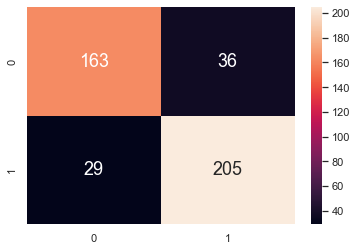

In [48]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7419354838709677

TPR Test :	 0.8314606741573034
TNR Test :	 0.6597938144329897

FPR Test :	 0.3402061855670103
FNR Test :	 0.16853932584269662


<AxesSubplot:>

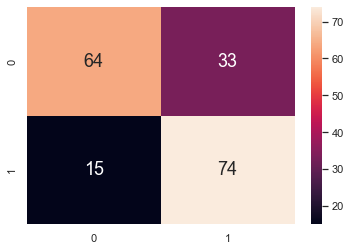

In [49]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})